In [76]:
# lib import 
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import os
import matplotlib.pyplot as plt


for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        


# load dataset 
df = pd.read_csv('/kaggle/input/optiver-trading-at-the-close/train.csv')

# random seed to produce same output
tf.random.set_seed(7)

/kaggle/input/testing-data-set/testing_data_set.csv
/kaggle/input/optiver-trading-at-the-close/public_timeseries_testing_util.py
/kaggle/input/optiver-trading-at-the-close/train.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/sample_submission.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/revealed_targets.csv
/kaggle/input/optiver-trading-at-the-close/example_test_files/test.csv
/kaggle/input/optiver-trading-at-the-close/optiver2023/competition.cpython-310-x86_64-linux-gnu.so
/kaggle/input/optiver-trading-at-the-close/optiver2023/__init__.py


In [77]:
df.head(5)

,stock_id,date_id,seconds_in_bucket,imbalance_size,imbalance_buy_sell_flag,reference_price,matched_size,far_price,near_price,bid_price,bid_size,ask_price,ask_size,wap,target,time_id,row_id
0,0,0,0,3180602.69,1,0.999812,13380276.64,NaN,NaN,0.999812,60651.50,1.000026,8493.03,1.0,-3.029704,0,0_0_0
1,1,0,0,166603.91,-1,0.999896,1642214.25,NaN,NaN,0.999896,3233.04,1.000660,20605.09,1.0,-5.519986,0,0_0_1
2,2,0,0,302879.87,-1,0.999561,1819368.03,NaN,NaN,0.999403,37956.00,1.000298,18995.00,1.0,-8.389950,0,0_0_2
3,3,0,0,11917682.27,-1,1.000171,18389745.62,NaN,NaN,0.999999,2324.90,1.000214,479032.40,1.0,-4.010200,0,0_0_3
4,4,0,0,447549.96,-1,0.999532,17860614.95,NaN,NaN,0.999394,16485.54,1.000016,434.10,1.0,-7.349849,0,0_0_4


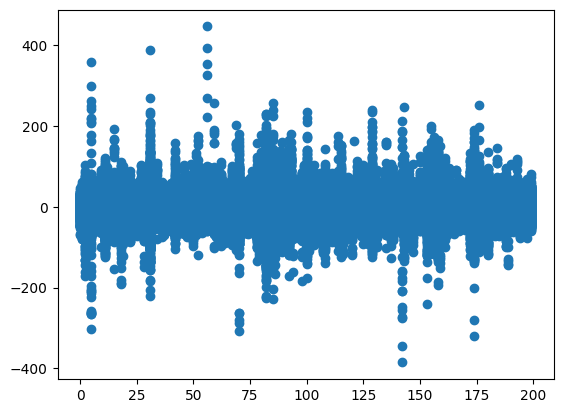

In [78]:
plt.scatter(df['stock_id'], df['target'])
plt.show()

In [63]:
# idk apparently you have to choose a column as the one that is the closting price so i chose near_price i could be wrong
closing_price_column_name = 'target'

# yeah define the column i chose
target = df[closing_price_column_name]
data = df.drop(closing_price_column_name, axis=1)

# split data into train and test sets
# smaller data for initial testing
X_train, X_test, y_train, y_test = train_test_split(data, target, train_size=0.01, test_size=0.001, random_state=42)


# input features standardized 
#scaler = StandardScaler()
scaler = MinMaxScaler(feature_range=(0, 1))
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
print(StandardScaler())

StandardScaler()


In [64]:
# define lstm model 
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mae')

# reshape input data for model assuming a time series format
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [65]:
# train
model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
 146/1637 [=>............................] - ETA: 34s - loss: nan

KeyboardInterrupt: 

In [13]:
# evaluate
loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {loss}')

# predict
predictions = model.predict(X_test)

32738/32738 [==============================] - 122s 4ms/step - loss: nan
Test Loss: nan
32738/32738 [==============================] - 109s 3ms/step


KeyboardInterrupt: 